# Data Science - practicum

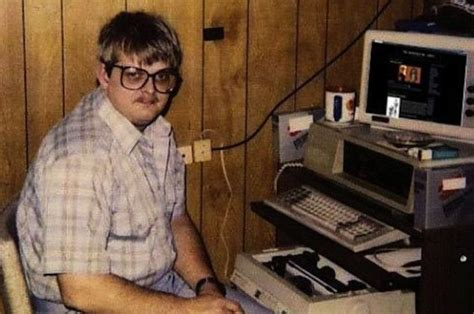

## Opdracht 1: Sea Level Change
### Global Average Absolute Sea Level Change, 1880-2014

https://www.kaggle.com/datasets/somesh24/sea-level-change

### Doel

- Inzicht in zeespiegelstijging
- Model maken dat stijging kan voorspellen

### Stap 1: Data inladen

In [ ]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y,'-',linewidth=2.0,)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

In [ ]:
# Use pandas to load 'sea_levels_2015.csv'
df_sl = pd.read_csv('../data/sea_levels_2015.csv')

df_sl.isnull().sum()

# ...

# To check if this set is complete, use:

# levels.isnull().sum()

### Stap 2: Data bekijken

In [ ]:
# Plot the sea level data
plt.figure(figsize=[22,14])
ax =plt.gca()
df_sl.plot('Time',ax=ax)
# ...

### Stap 3: Trends zoeken

- Zijn er trends zichtbaar in de data?
- Zo ja, welke zijn dat?
- Zoom desnoods wat in; neem als range 1 jaar

Bouw op basis van deze inzichten een model.

In [ ]:
#def modelfunc(x,b,c,d,x):
#     x=np.array(x)
#     return b*x**2+c*x+d 
def modelfunc(x,a,b,c,d,e):
     return b*x+c*np.sin(d*x)+e
     #return a*x+d
     #x=np.array(x)
     #return b*x**2+c*np.sin(x)+d
     #return a*np.exp(x)+d
 

# Fit your model
dt = pd.to_datetime(df_sl['Time'])
x = np.arange(df_sl['Time'].shape[0])
fit_result =sp.optimize.curve_fit(modelfunc,x,df_sl['GMSL'])
#fit_result =sp.optimize.curve_fit(modelfunc,df_sl['Time'],np.array(df_sl['GMSL']))
print(fit_result)

# Plot your fit
pred_sl= modelfunc(x,*fit_result[0])
ax = plot_init()
plot_add(ax,x,pred_sl)
plot_add(ax,x,df_sl['GMSL'])
plot_show()

#plt.plot(dt,pred_sl)
# ...

In [ ]:
df_time = df_sl['Time']
type(df_time[0])
dt = pd.to_datetime(df_sl['Time'])

### Stap 4: Voorspellen

Kun je op basis van je model voorspellen wat de gemiddelde zeespiegel is in 2100?

In [ ]:
# Extrapolate to 2100 with your model

import datetime

yearpred = 2100
#timeend = datetime.datetime(2100,1,1)
#timedelta = timeend - dt[dt.shape[0]-1]
yearlast = dt[dt.shape[0]-1].year

deltayear = yearpred-yearlast

nr_timesteps = dt.shape[0]+deltayear*12 #tijdstap  = maand 

#a,b,c,d=fit_result[0]
sl_2100= modelfunc(np.arange(nr_timesteps),*fit_result[0])
#sl_2100= modelfunc(range(nr_timesteps),*fit_result[0])

plt.plot(sl_2100)



# ...

# Optional: can you plot the future up to 2100?

# ...

Is je uitkomst verontrustend?

## Opdracht 2: COVID-19
### Visualizations, Predictions, Forecasting

https://www.kaggle.com/code/neelkudu28/covid-19-visualizations-predictions-forecasting

### Doel

- Inzicht in verloop COVID in India
- Model maken dat verloop kan voorspellen
- Ervaren hoe het is om met beperkte data de toekomst te moeten voorspellen

### Stap 1: Data inladen

In [ ]:
# Use pandas to load 'covid_19_data.csv'
pd_cov = pd.read_csv('../data/covid_19_data.csv')

pd_cov.keys()
#set(pd_cov['Country/Region'].to_list())
# ...

# To check if this set is complete, use:

# covid.isnull().sum()

### Stap 2: Filteren

We gaan het verloop van India bekijken.

In [ ]:
# Put the India data in an india dataframe
pd_cov_ind = pd_cov[pd_cov['Country/Region']=='India']
print(pd_cov_ind.keys())


# Make a new column with the active cases, use:
pd_cov_ind['Active'] = pd_cov_ind['Confirmed'] - pd_cov_ind['Recovered']-pd_cov_ind['Deaths']
print(pd_cov_ind)
# Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases

### Stap 3: Range selecteren

De uitbraak is in volle gang.

In [ ]:
#print(pd_cov_ind['datetime'].dtype)
pd_cov_ind['Active'].plot()

In [ ]:
# Select the range from februari to july
dt_cov = pd.to_datetime(pd_cov_ind['ObservationDate'])
#print(dt_cov)
pd_cov_ind['datetime']=dt_cov

pd_cov_ind2 = pd_cov_ind[(dt_cov>datetime.datetime(2020,2,1)) & (dt_cov<datetime.datetime(2020,7,1))]
print(pd_cov_ind2)
print(pd_cov_ind2.shape)
print(pd_cov_ind2.shape)
pd_cov_ind2.plot('datetime','Active')
# ...

### Stap 4: Voorspellen

Aan jou de taak om het verloop tot en met december te voorspellen.

In [ ]:
#print(pd_cov_ind.isnull().sum()) 
#mooi, voor alle dagen hebben we data 

# De gegevens voor India zijn verdeeld over verschillende regio's.
# Deze moeten samengevoegd worden. 
# Eerst groeperen op datum.
temp = pd_cov_ind.groupby(pd_cov_ind['datetime'])
#Daarna deze samenvoegen.
cov_act_ind= temp.aggregate({'Active':'sum'}) # per dag. 
#print(temp2.index[1:]-temp2.index[0:-1])

# en voor de periode feb -jul
temp2 = pd_cov_ind2.groupby(pd_cov_ind['datetime'])
#Daarna deze samenvoegen.
#print(temp2.index[1:]-temp2.index[0:-1])
cov_act_ind2= temp2.aggregate({'Active':'sum'}) # per dag. 



In [ ]:
# def model(a, b, c, ...):
#   ...
def model(x,a,b,c,d):
    #return a*np.exp(b*x)+c*x+d
    return a*x**3+b*x**2+c*x+d 
    #return b*x**2+c*x+d 
    #return a*np.exp(b*x)

# Fit your model, op basis van data februari - juli
fit_result =sp.optimize.curve_fit(model,np.arange(cov_act_ind2.shape[0]),cov_act_ind2['Active'])
# ...
pred_cov = model(np.arange(cov_act_ind.shape[0]),*fit_result[0])
pred_cov2 = model(np.arange(cov_act_ind2.shape[0]),*fit_result[0])

# Plot your fit up to september (data loopt tot september!!)

print(fit_result)
# Plot your fit
ax = plot_init()
plot_add(ax,cov_act_ind.index,pred_cov)
plot_add(ax,cov_act_ind2.index,pred_cov2)
plot_add(ax,cov_act_ind.index,cov_act_ind)
plot_show()

# ...

Zit je er ver naast?

## Opdracht 3: Coca Cola Stock
### Performance of Coca Cola Stock from 1962 to today

https://www.kaggle.com/datasets/kalilurrahman/coca-cola-stock-live-and-updated

### Doel

- De koers van Coca Cola voorspellen
- Rijk worden!!!

### Stap 1: Data inladen

In [36]:
# Use pandas to load 'coca_cola_stock_history.csv'
df_cola = pd.read_csv('../data/coca_cola_stock_history.csv')
# ...

# To check if this set is complete, use:
df_cola.isnull().sum()
# het is compleet hoor. We kunnen aan de slag

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Stap 2: Range selecteren

Het is het jaar 1997 dus je beschikt over aardig wat koersdata.

In [63]:
df_cola.keys()
# We hebben een probleem, de tijd-informatie is niet op een consistente manier opgeslagen.
#
dump = df_cola['Date']
dt=[]
for t in dump:
    datum = t.split(' ')[0]
    dt.append(datetime.datetime.strptime(datum,'%Y-%m-%d'))


dt_cola= pd.to_datetime(dt)
print(dt_cola)




DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26'],
              dtype='datetime64[ns]', length=15311, freq=None)


In [78]:
# Select the data between begin 1962 and end 1997
print(dt_cola.dtype)
#print(dt_cola[15000:15310]>datetime.datetime(1962,1,1))
#xx
print(df_cola.shape)
dt_sel = dt_cola[(dt_cola>datetime.datetime(1962,1,1)) & (dt_cola<datetime.datetime(1998,1,1))]
print(dt_sel[0])
print(dt_sel[-1])
print(dt_sel)
df_sel= df_cola[(dt_cola>datetime.datetime(1962,1,1)) & (dt_cola<datetime.datetime(1998,1,1))]
print(df_sel.shape)
# ...

datetime64[ns]
(15311, 8)
1962-01-02 00:00:00
1997-12-31 00:00:00
DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '1997-12-17', '1997-12-18', '1997-12-19', '1997-12-22',
               '1997-12-23', '1997-12-24', '1997-12-26', '1997-12-29',
               '1997-12-30', '1997-12-31'],
              dtype='datetime64[ns]', length=9065, freq=None)
(9065, 8)


### Stap 3: Tends zoeken

- Zijn er trends zichtbaar in de data?
- Zo ja, welke zijn dat?

Bouw op basis van deze inzichten een model.

(9065,)


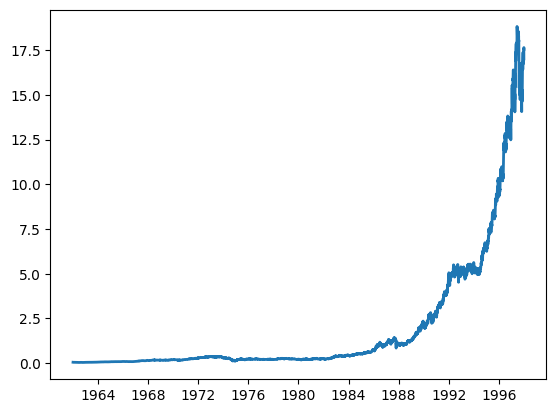

In [80]:
print(dt_sel.shape)

ax = plot_init()
plot_add(ax,dt_sel,df_sel['Close'])

In [101]:
df_sel['Close'][0:-1:100].shape

(91,)

In [107]:
x = np.array([10, 19, 30, 35, 51])
y = np.array([1, 7, 20, 50, 79])
sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y)

(array([5.60728326e-21, 9.99993501e-01]),
 array([[ 4.31577538e-27, -1.50943588e-08],
        [-1.50943588e-08,  5.27922904e+10]]))

(array([15.7231711 , 26.62818968,  4.52738215,  1.        ]), array([[inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf]]))


c:\Users\marcr\MakeAIWork3\env_miw3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


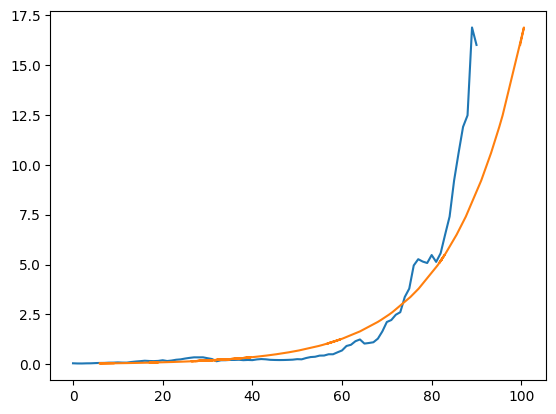

In [121]:
def model_cola(x,a, b, c,d):
    return a*np.log(b*x)+c
#   ...


#print(len(dt_sel))
#xx
# Fit your model
y =df_sel['Close'][0:-1:100]
x=np.arange(len(y))
plt.plot(x,y)
#fit_res = sp.optimize.curve_fit(model_cola,np.arange(len(dt_sel)),df_sel['Close'][0:-1:100])
fit_res = sp.optimize.curve_fit(model_cola,y,x)
print(fit_res)
# ...
plt.plot(model_cola(y,*fit_res[0]),y)
# Plot your fit

# ...

### Stap 4: Big bet

- Doe op basis van je model een voorspelling voor december 2021

Dit is de prijs die je gaat betalen voor je _future_.

In [ ]:
# Extrapolate to 2021 with your model

# ...

### Stap 5: Winning...?

Je hebt 10.000 _futures_ Coca Cola gekocht. Dit betekent dat je de aandelen Coca Cola MOET kopen.

- Als de waarde lager is dan je voorspelling: bingo!

In [ ]:
# Compute your profit or loss

# ...

...or losing? Hoeveel geld heb je gewonnen / verloren?